# Hierarchical Clustering

## Zaidan Mufaddhal | AIU20092029

### 1. Data pre-processing step

#### Importing libraries

In [2]:
# Importing the libraries  
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

#### Importing dataset

In [4]:
# Importing the dataset  
rawdata = pd.read_csv('Downloads/ClusteringHSS.csv')  

In [5]:
rawdata

,ID,Gender_Code,Region,Income,Spending
0,1,Female,Rural,20.0,15.0
1,2,Male,Rural,5.0,12.0
2,3,Female,Urban,28.0,18.0
3,4,Male,Urban,40.0,10.0
4,5,Male,Urban,42.0,9.0
...,...,...,...,...,...
1108,1109,Female,Urban,33.0,16.0
1109,1110,Male,Urban,48.0,7.0
1110,1111,Male,Urban,31.0,16.0
1111,1112,Male,Urban,50.0,14.0


#### Cleaning the null value

In [6]:
rawdata.isnull().sum()

ID             0
Gender_Code    6
Region         6
Income         6
Spending       5
dtype: int64

In [7]:
data = rawdata.dropna()

In [8]:
data.isnull().sum()

ID             0
Gender_Code    0
Region         0
Income         0
Spending       0
dtype: int64

#### Extracting independent variables

In [9]:
x = data.iloc[:, [3, 4]].values 

In [10]:
x

array([[20., 15.],
       [ 5., 12.],
       [28., 18.],
       ...,
       [31., 16.],
       [50., 14.],
       [26., 11.]])

### 2. Finding the optimal number of clusters using the dendogram method

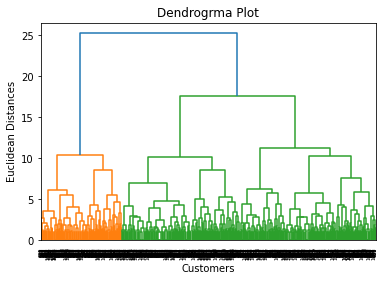

In [23]:
#Finding the optimal number of clusters using the dendrogram  
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="average"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")  
plt.show()  

### 3. Training the hierarchical algorithm on the training dataset

In [20]:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='average')  
y_pred= hc.fit_predict(x) 

In [21]:
y_pred

array([0, 6, 2, ..., 2, 1, 5], dtype=int64)

### 4. Visualizing the clusters

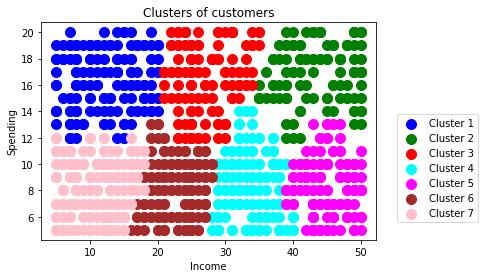

In [22]:
#visulaizing the clusters  
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') 
plt.scatter(x[y_pred == 5, 0], x[y_pred == 5, 1], s = 100, c = 'brown', label = 'Cluster 6') 
plt.scatter(x[y_pred == 6, 0], x[y_pred == 6, 1], s = 100, c = 'pink', label = 'Cluster 7')
plt.title('Clusters of customers')  
plt.xlabel('Income')  
plt.ylabel('Spending')  
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()  